# Lab 5: Supervised Learning - k-Nearest Neighbor (kNN) Algorithm 

In this lab, we will make first steps in doing supervised learning. in particular, we will learn about the k-Nearest Neighbor (kNN) algorithm. kNN uses a simple idea: "you are what your neighbors are". This idea work quite well in data science. In the first part of the lab, we will cover some background needed to understand the kNN algorithm. In the second part, you will be asked to apply your knowledge on another data set. 

## Lab 5.A: kNN Tutorial with Questions (30% of grade)

As usual, let us start by importing the needed libraries. We will continue using the sklearn library, which implements many of the most popular data science algorithms. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

Let us load the Iris data set using a sklearn function `load_iris`.

In [3]:
iris = datasets.load_iris()

As you can see from http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html, `iris` is an object with attributes `data` (a 150x4 matrix, where $i$-th row are 4 attributes of the $i$-th flower), `feature_names` (the names of the 4 attributes -- remember that in data science "attribute" and "feature" means the same thing), `target` (a vector of length 150, where $i$-th number is the type of the $i$-th flower -- in data science people often say "label" instead of "target"), `target_names` (these are strings explaining what each of the 3 types of flowers are), and `DESCR` (giving some information about the Iris data set). Let us list them all 

In [4]:
print(iris.DESCR)
print(iris.data)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

So, we can see that the attributes of the second flower are `[4.9, 3.0, 1.4, 0.2]`, which means its `sepal_length` is 4.9 cm, `sepal_width` is 3.0 cm, `petal_length` is 1.4 cm, and `petal_width` is 0.2 cm. We will write it matematically as $x_2 = [x_{21}, x_{22}, x_{23}, x_{24}] = [4.9, 3.0, 1.4, 0.2]$. We see that its `target` is 0, which means the type of this iris is `setosa`. We will write it matematically as $y_2 = 0$. All this information was obtained by real botanists who studied iris flowers trying to understand the physical measurements that discriminate between the 3 different types of those flowers.

In data science, people like to denote this data set as $D_{Iris} = \{(x_i, y_i), i = 1, 2 ... 150\}$, meaning that data set $D_{Iris}$ is a set of 150 labeled examples $(x_i, y_i)$. An alternative is to write $D_{Iris} = \{X_{Iris}, Y_{Iris}\}$.

### Supervised Learning
Supervised learning is a game with the following objective. You are given the iris data set $D_{Iris}$ where you know 4 attributes and target values for 150 irises and your objective is to come up with a computer program that predicts a type of any iris flower given the values of its 4 attributes. Written in pseudocode, this is what you have to do:

`predictor = create(algorithm_type, D)
y_new = predictor(x_new)`

In the first line, you are running a `create` function that takes as input data set `D` and the name of a supervised learning algorithm `algorithm_type` and produces as an output a computer program `predictor`. In the second line, you are using `predictor` to predict the label (`y_new` value) for a flower whose attributes are given by `x_new`.

### kNN Algorithm
kNN is a popular supervised learning algorithm that allows us to create `predictor`. The idea of kNN is that the label of flower `x_new` depends on labels of flowers in its neighborhood. In particular, kNN finds the distance between `x_new` and every example `x` in data set `D`. Then, it looks at the label `y` of k examples which are the closest to `x_new`. The predicted label `y_new` is obtained as the most common label in the group of the k nearest neighbors.

**Parameter choice**. We need to make a few decisions when running kNN. The most important is the choice of `k`. If `k = 1`, then we are looking only at the hearest neighbor and it might not be a good idea if we are dealing with noisy data. If `k` is very large, then we might be counting far neighbors that might have different properties. Other decisions include the choice of distance metric (Euclidean is the standard one) and the choice whether to weight closer neighbors more than the farther ones.

**Accuracy**. When deciding which parameters to pick or which supervised learning algorithm to use (there are popular algorithms other than kNN), the question is how to measure which choice is better. The answer is to check if `predictor` provides accurate prediction. Given a data set `D`, a typical way to check accuracy is to randomly split `D` into two data sets, `D_train` and `D_test`. Then, `predictor` is created/trained using `D_train` data set and its accuracy is checked using `D_test`. In particular, we use `predictor` to predict label of every example from `D_test` and compare it with the true labels. The percentage of the correct guesses on `D_test` is reported as accuracy of `predictor`.

## kNN Demo
The following piece of code is taken from:
http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py. Let us run it.

c:\users\inceptix\documents\github\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


<Figure size 432x288 with 0 Axes>

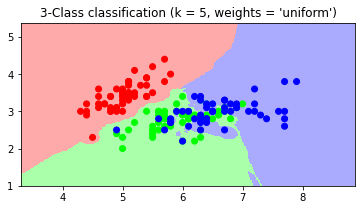

In [5]:
k = 5# how many nearest neighbors are consulted

X = iris.data[:, [0,1]]  # we only take the first two features. We could
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

The resulting figure shows the predictions of kNN when $k=1$. If `x_new` is in the blue region, the prediction will be the blue class. From this picture, we can observe a small blue blobs inside the predominantly gray area. This is because the nearest neighbor in this area is the blue example. 

**Question 1**. Change value of k to 3 and observe if there is any difference. Discuss what you see and why.

**Question 2**. Change k to an even higher value, let us say to 25. What do we see now? Discuss.

**Queston 3**. In the line that creates `clf` change weights='uniform' to weights='distance'. Check the documentation or google to understand what it means. Explain. Run the code and discuss if you see any difference.


**Answer 1**: When changing the value of k to k=3 the graph because more smooth. The original value for k was k=1. THe algorithm used only 1 neighbor/data point to determine the color of the area whereas when k=3 it uses up to 3 neighborhs which is why the graph becomes less choppy and we see blue less areas inside the green and green areas inside the blue.

**Asnwer 2**: Changing k to 25 makes colors on the graph even smoother and doesn't create neighborhoods on one color inside the other even though there are nodes there. Because k is so large it's taking into consideration many more nodes and deciding that way.

**Answer 3**: This change basically changes the voting system that the kNN algorith uses to determine which neighbors are taken into consideration. When we had weights='uniform' every node was given the same amount of power or weight when being under consideration. However, when changing the weights to distance, nodes are given importance based on distance from each other. If for example a blue node with k=5 would have 2 blue nodes and 3 green near it but the green nodes are much farther then the neighborhood would be determined as blue.

### Training and testing
  As mentioned above, the typical mechanism for testing accuracy of a `predictor` is to split the data randomly into training and testing, train `predictor` on training data and test its performance on test data. Let us see how it can be done.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

**Question 4**. What is the size of the resulting objects?

Now that we created training and test sets, we can train a kNN classifier using the training data. Before moving forward, let us take a second and take a look at the documentation for kNN implementation in sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

Let us train the kNN predictor:

**Answer 4**: It seems as though we split the data is such a way that the training size is about 2/3 and testing data is the 1/3 that remains.

In [36]:
k = 1   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
print(predictor)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


Now that we trained `predictor` we can use it to provide predictions on any example `x`. 

In [44]:
# select the first 4 test examples
i = [0,1,2,3]
x = X_test[i,:]
print(x)
# predict its label
yhat = predictor.predict(x)
# compare predicted and true labels
print(list(zip(yhat,y_test[i])))

[[6.3 3.3]
 [5.1 3.5]
 [4.8 3.4]
 [6.4 2.9]]
[(1, 2), (0, 0), (0, 0), (2, 1)]


**Question 5**. Did your kNN predictor do a good job in predicting labels of the first 4 test examples? 

**Question 6**. Write a piece of code that calculates the accuracy on those 4 test examples (number of correct guesses divided by the total number of guesses

**Question 7**. Find the predictions on all test examples in `X_test` and calculate the accuracy using your code from *Question 6*.

Pay attention that methods in sklearn.neighbors.KNeighborsClassifier allow you to test the accuracy in a faster way (you should not use it to answer Questions 6 and 7):

**Answer 5**: The kNN predictor got 50% accuracy on the first 4 examples of X_test. 

**Answer 6**

In [45]:
### Answer 6 ###

sum(1 for x,y in zip(yhat,y_test[i]) if x == y) / len(yhat)

0.5

**Answer 7**

In [46]:
### Answer 7 ###
x = X_test
#print(x)

yhat_2 = predictor.predict(x)
print(list(zip(yhat_2, y_test)))
print()
print("Accuracy is ", sum(1 for x,y in zip(yhat_2, y_test) if x==y) / len(yhat_2))


[(1, 2), (0, 0), (0, 0), (2, 1), (1, 1), (0, 0), (2, 2), (1, 2), (2, 2), (2, 2), (1, 1), (0, 0), (2, 2), (1, 1), (2, 2), (0, 0), (2, 2), (1, 2), (0, 0), (0, 0), (1, 1), (0, 0), (2, 1), (2, 2), (0, 0), (0, 0), (2, 2), (2, 1), (0, 0), (2, 2), (2, 2), (1, 1), (1, 1), (2, 1), (1, 2), (2, 1), (0, 0), (1, 2), (1, 0), (2, 2), (2, 2), (1, 2), (2, 2), (1, 1), (1, 2), (2, 2), (0, 0), (1, 1), (1, 2), (1, 2)]

Accuracy is  0.7


In [47]:
accuracy = predictor.score(X_test,y_test)
print(accuracy)

0.7


**Question 8**. Train `predictor` using different choices of k. Try $k = 1, 3, 5, 15, 25, 50$. Report the accuracies on the test data (you can use the score method). Which choice of $k$ resulted in the highest accuracy? Comment briefly if the results make sense to you.

**Question 9**. Other than choice of $k$, `KNeighborsClassifier` allows you to make some other choices. For example, in *Question 3* you saw that you can use a weighted prediction. There are few other options. Study the documentation and summarize in few sentences what other options you have when training the kNN classifier.

**Answer 8**: When trying out different k values, $k=1$ and $k=5$ both have the same accuracy of 72% and they are both the highest accuracies out of the listed k values. I think the values $15, 25$, and $50$ probably suffer from overfitting, whereas, the value 1 is probably just getting lucky, or the dataset is such that it works with 1. I think the value 5 gives the best prediction.

**Answer 9**: The other options for training the kNN classifier are to use, `distance='weights'` or to use a user defined array of instances. A user defined array would come in handy if the user can manually input the weights of each data point based on prior knowledge of the data set.

## Lab 5.B Training kNN classifier on Iris and Wine Quality data (70% of grade)
In this part of the lab you will use your knowledge to train and test accuracy of kNN classifiers on Iris and Newsgroups data.

#### Iris Questions
In Lab 7.A you used only the first two attributes of Iris for prediction. You have 2 questions:

**Question Iris 1**. Train kNN classifier on other pair of attributes. Use $k$ of your choice and feel free to keep other choices at their default values. Which pair of attributes results in the highest accuracy?

**Question Iris 2**. Train kNN classifier using all 4 attributes. Report the accuracy on test data set. Play with parameters of kNN to try to find a combination that results in the highest accuracy. Can you find something that works better than $k=3$ and default choices?

#### Wine Quality Questions
Wine Quality data set can be accessed from the UCI Machine Learning Repository website at https://archive.ics.uci.edu/ml/datasets/Wine+Quality. In this lab you will be working with the white wine data set https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

**Question Wine 1** Perform EDA on the data set to get an insight into the data. Prepare 1 page pdf document summarizing the interesting aspects of the data. Upload the pdf file named WineEDA.pdf to Canvas.

**Question Wine 2**. Since kNN is a relatively slow algorithms, create your data set by picking 2,000 examples randomly. Pay attention that the 12th column in the data set (quality) should be your label (call it y) and the first 11 columns should be your attribues (call it X). Because y are numbers from 0-10, let us create a binary label by converting ratings 7 and below to 0 and ratings above 7 as 1. Split your data into 66% training and 33% test data sets. Train a kNN classifier ($k=3$ and defaults) on the training data and test its accuracy on test data. Record the computational time needed to run this. Report the accuracy.

**Question Wine 3**. Train a kNN classifier using different values of $k$ and any other different choice of hyperparameters, hoping to improve accuracy. Report the results.

**Question Wine 4** Pay attention that range of vallues for different attributes is quite different. *Question*: what is the impact of attributes with different ranges to kNN algorithm? In order to give each attribute equal change, scale each attribute to the same range to make sure the minimum is 0 and maximum is 1. *Question*: What is the formula to achieve this? Implement this formula and create a scaled data set (remember, any scaling you apply on the training data should also be used on the test data). Apply kNN and measure the accuracy. Did your accuracy improve?

**Question Wine 5** Instead of treating the last column (quality) as a class label, we can treat is as numeric output. In the original format, the numbers range from 0 to 10. If we want to predict that number, the problem becomes regression. As we covered in class, kNN can also be used for regression. It is also implemented by sklearn. Use sklearn to test the accuracy of knn regression. Remember that the formula for regression accuracy is average squared error, also called the Mean Squared Error (MSE). 

**Deliverables** Submit the 1-page pdf file for EDA. Also, submit this notebook (enhanced with needed code) with all answers (added as tect comments) and all executed code for all the questions.

In [49]:
### Answer Iris 1 ###

X = iris.data[:, [1,2]]  # Import features 2 and 3
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=4)

k = 20   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
print(predictor)

accuracy = predictor.score(X_test,y_test)
print(accuracy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')
0.9736842105263158


**Answer Iris 1**: By using $k=25$ and `features 2 and 3` I am able to get the highest accuracy of ~97%

In [50]:
X = iris.data  # Import all features
y = iris.target

# K-Nearest Neighbors

# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print(scores.mean())

0.9800000000000001


**Answer Iris 2**: By using $k=13$ and default value I have found a better score of 98% better than that of $k=3$ which is 96%.

**Answer Wine 1**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

whiteWine = pd.read_csv('winequality-white.csv', sep=';')
whiteWine['quality'] = pd.Categorical(whiteWine.quality)
whiteWineCopy = whiteWine.copy()
whiteWineCopy['wine type'] = 'white'

In [52]:
whiteWine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [53]:
whiteWine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


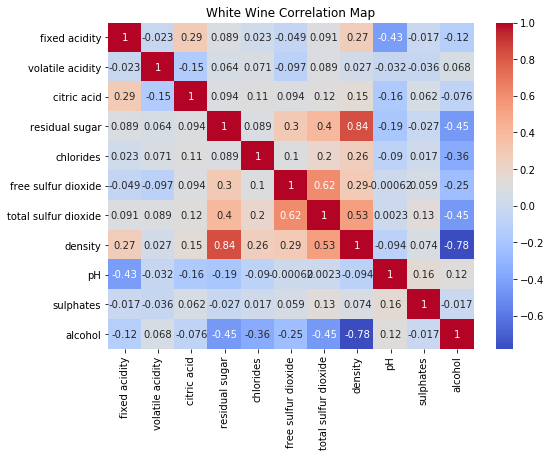

In [54]:
plt.figure(figsize =(18, 6))
plt.subplot(1,2,1)
plt.title('White Wine Correlation Map')
sns.heatmap(whiteWine.corr(), annot=True, cmap='coolwarm')

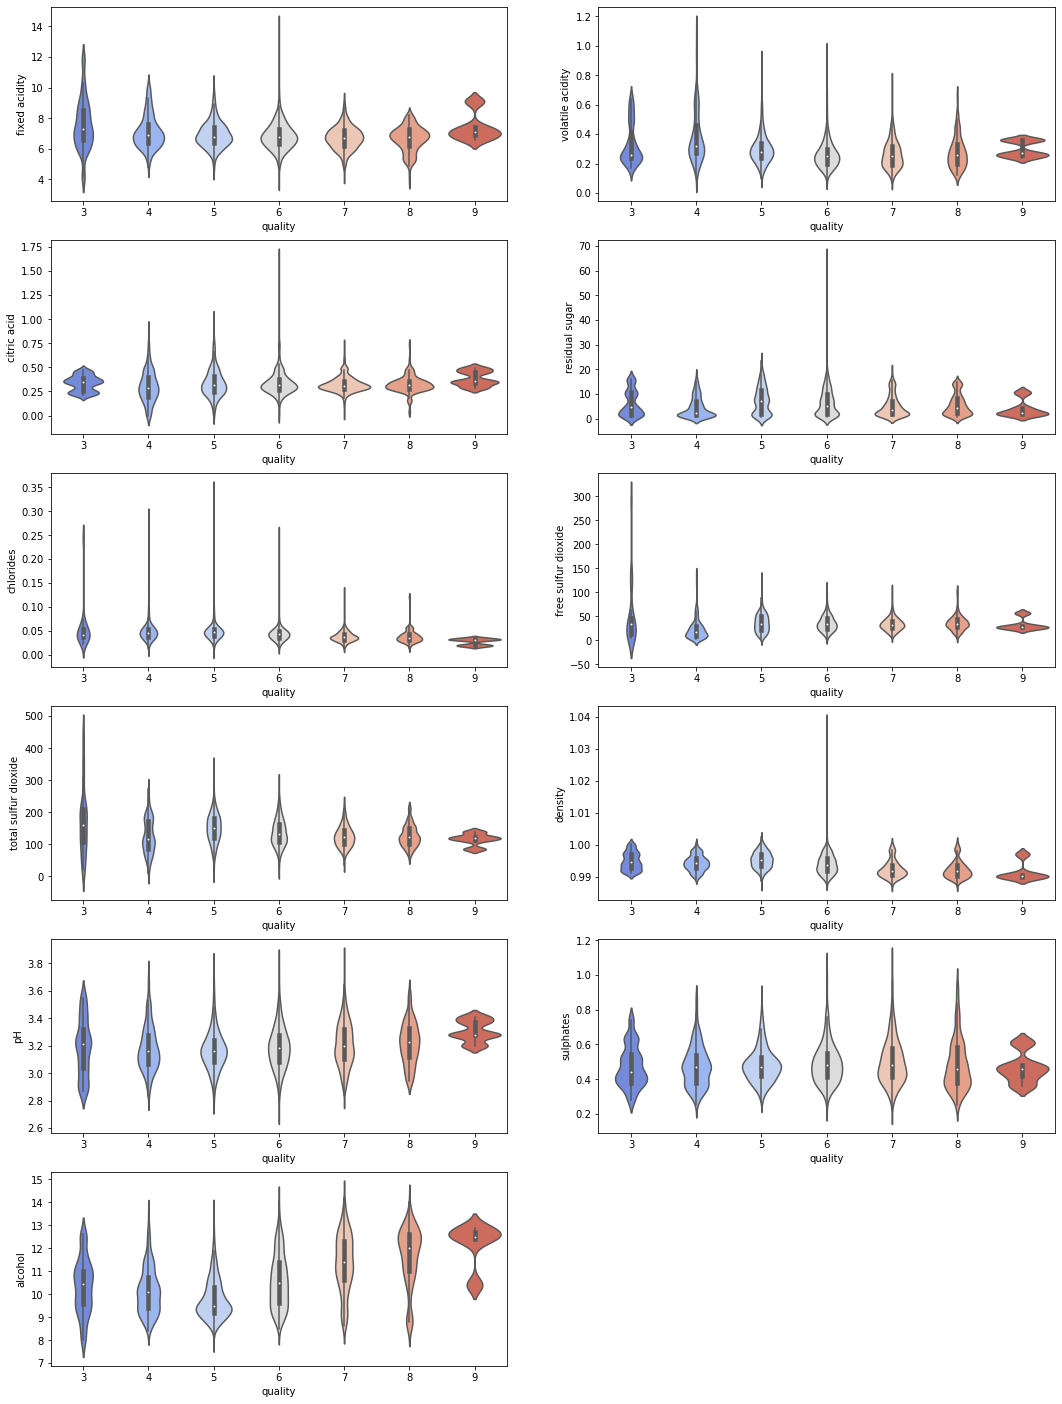

In [55]:
#Let's try looking at each of the columns against quality
plt.figure(figsize=(18,25))
plt.subplot(6,2,1)
sns.violinplot(x='quality', y='fixed acidity', data=whiteWine, palette='coolwarm',  split=True, bw=0.3)
plt.subplot(6,2,2)
sns.violinplot(x='quality', y='volatile acidity', data=whiteWine, palette='coolwarm',  split=True, bw=0.3)
plt.subplot(6,2,3)
sns.violinplot(x='quality', y='citric acid', data=whiteWine, palette='coolwarm',  split=True, bw=0.3)
plt.subplot(6,2,4)
sns.violinplot(x='quality', y='residual sugar', data=whiteWine, palette='coolwarm',  split=True, bw=0.3)
plt.subplot(6,2,5)
sns.violinplot(x='quality', y='chlorides', data=whiteWine, palette='coolwarm',  split=True, bw=0.3)
plt.subplot(6,2,6)
sns.violinplot(x='quality', y='free sulfur dioxide', data=whiteWine, palette='coolwarm',  split=True, bw=0.3)
plt.subplot(6,2,7)
sns.violinplot(x='quality', y='total sulfur dioxide', data=whiteWine, palette='coolwarm',  split=True, bw=0.3)
plt.subplot(6,2,8)
sns.violinplot(x='quality', y='density', data=whiteWine, palette='coolwarm',  split=True, bw=0.3)
plt.subplot(6,2,9)
sns.violinplot(x='quality', y='pH', data=whiteWine, palette='coolwarm',  split=True, bw=0.3)
plt.subplot(6,2,10)
sns.violinplot(x='quality', y='sulphates', data=whiteWine, palette='coolwarm',  split=True, bw=0.3)
plt.subplot(6,2,11)
sns.violinplot(x='quality', y='alcohol', data=whiteWine, palette='coolwarm',  split=True, bw=0.3)

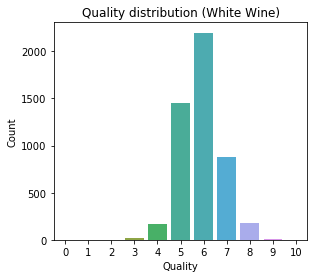

In [56]:
#Look at some bar plots for the distribution of qualities
names = [i for i in range(0, 11)]
sizeW = [0, 0, 0, 20, 163, 1457, 2198, 880, 175, 5, 0]
sizeR = [0, 0, 0, 10, 53, 681, 638, 199, 18, 0, 0]
plt.figure(figsize =(10, 4))
#White Wine
plt.subplot(1,2,1)
plt.title('Quality distribution (White Wine)')
plt.xlabel('Quality')
plt.ylabel('Count')
sns.barplot(x=names, y=sizeW)

**Answer Wine 2**

In [57]:
from sklearn.preprocessing import StandardScaler
from operator import itemgetter
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score
from sklearn import preprocessing

#Let's go from 7 classifications to 2
whiteWine2 = whiteWine.copy()
whiteWine2['quality']=pd.cut(whiteWine2['quality'], 2, labels=["0", "1"])

X = whiteWine2.drop('quality', axis=1)
y = whiteWine2['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# check classification accuracy of KNN with K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print("Accuracy of predictor is", scores.mean())

Accuracy of predictor is 0.7353799924877926


The accuracy of the predictor is around 74%. The time that it takes to train even with the whole data set is less than 2 seconds.

**Answer Wine 3**

In [61]:
knn_15_distance = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_ball_tree = KNeighborsClassifier(weights='distance', algorithm='ball_tree')
knn_25 = KNeighborsClassifier(n_neighbors=25)
knn_p1 = KNeighborsClassifier(p=1)

knn_15_distance.fit(X_train, y_train)
knn_distance_ball_tree.fit(X_train, y_train)
knn_25.fit(X_train, y_train)
knn_p1.fit(X_train, y_train)

scores1 = cross_val_score(knn_15_distance, X, y, cv=10, scoring='accuracy')
scores2 = cross_val_score(knn_distance_ball_tree, X, y, cv=10, scoring='accuracy')
scores3 = cross_val_score(knn_25, X, y, cv=10, scoring='accuracy')
scores4 = cross_val_score(knn_p1, X, y, cv=10, scoring='accuracy')

print("Accuracy of knn_15_distance predictor is", scores1.mean())
print("Accuracy of knn_distance_ball_tree predictor is", scores2.mean())
print("Accuracy of knn_25 predictor is", scores3.mean())
print("Accuracy of knn_p1 predictor is", scores4.mean())

Accuracy of knn_15_distance predictor is 0.7625445515629565
Accuracy of knn_distance_ball_tree predictor is 0.7494728934518593
Accuracy of knn_25 predictor is 0.7774554484370435
Accuracy of knn_p1 predictor is 0.7594804056591962


Based on the accuracy numbers above it seems like the predictor with the highest number of neighbors used is the one that gives the most accuracy.

**Answer 4**
I think that normalizing the data will give an advantage to the algorithm. The way the data is right now it is using different scales for lots of it's attributes. For example the way that alcohol is measured is not the same the way pH or residual sugar is measured. Having those data be normalized should give a boost to accuracy.

In [62]:
whiteWine2[['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH','sulphates','alcohol']] = preprocessing.MinMaxScaler().fit_transform(whiteWine2[['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH','sulphates','alcohol']])
whiteWine2.head()

X2 = whiteWine2.drop('quality', axis=1)
y2 = whiteWine2['quality']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33)

# check classification accuracy of KNN with K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X2_train, y2_train)

scores = cross_val_score(knn, X2, y2, cv=10, scoring='accuracy')

print("Accuracy of predictor is", scores.mean())

Accuracy of predictor is 0.7813288260089312


The formula I used with the MinMaxScaler() is this:
The transformation of the data is made with 
`X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min`

and then it is calculated by doing 
`X_scaled = scale * X + min - X.min(axis=0) * scale
where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))`

I observed a 4% accuracy increase after the normalization.

**Answer 5**

In [67]:
from sklearn.metrics import mean_squared_error
from math import sqrt

Xr = whiteWine
yr = whiteWine['quality']
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.33)

test = np.array(Xr_test)


rmse_val = []

for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(Xr_train, yr_train) #fit the model and predict
    pred = model.predict(test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 5.754028461644499
RMSE value for k=  2 is: 5.7242202602735475
RMSE value for k=  3 is: 5.716239444746791
RMSE value for k=  4 is: 5.714897829769143
RMSE value for k=  5 is: 5.703259925569091
RMSE value for k=  6 is: 5.699133651089569
RMSE value for k=  7 is: 5.694877146305186
RMSE value for k=  8 is: 5.695012817867138
RMSE value for k=  9 is: 5.697784951508985
RMSE value for k=  10 is: 5.69530940029781
RMSE value for k=  11 is: 5.693247289549228
RMSE value for k=  12 is: 5.693528542519265
RMSE value for k=  13 is: 5.693950921057079
RMSE value for k=  14 is: 5.698978138500271
RMSE value for k=  15 is: 5.699689872832087
RMSE value for k=  16 is: 5.700280032369771
RMSE value for k=  17 is: 5.69955203701218
RMSE value for k=  18 is: 5.6996338264547335
RMSE value for k=  19 is: 5.69914366655892
RMSE value for k=  20 is: 5.698547998289252


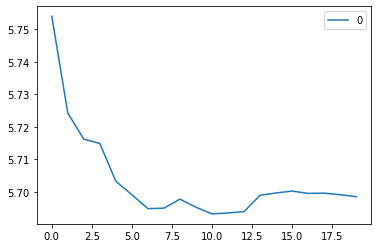

In [68]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()